In [ ]:



import zipfile 
import requests 
import base64 
import io 



url = "https://www.kaggle.com/api/v1/datasets/download/richardalon/salaries-2024?datasetVersionNumber=1"



cred = base64.b64encode(bytes("richardalon:2ad3ef339a567f55a35db4236c7ca79d", "ISO-8859-1")).decode("ascii")
header = {
    "Authorization" : f"Basic {cred}"
}



response = requests.get(url, headers=header)



file = zipfile.ZipFile(io.BytesIO(response.content))
file_name = "salaries.csv"




In [3]:


url = "https://www.kaggle.com/api/v1/datasets/download/richardalon/salaries-2024?datasetVersionNumber=1"




In [4]:


cred = base64.b64encode(bytes("richardalon:2ad3ef339a567f55a35db4236c7ca79d", "ISO-8859-1")).decode("ascii")
header = {
    "Authorization" : f"Basic {cred}"
}



In [5]:



response = requests.get(url, headers=header)



In [6]:


file = zipfile.ZipFile(io.BytesIO(response.content))
file_name = "salaries.csv"



In [7]:



df = pd.read_csv(file.open(file_name))



df.head()




,Gender,Age,Department,Department_code,Years_exp,Tenure (months),Gross
0,0,25,Tech,7,7.5,7,74922
1,1,26,Operations,3,8.0,6,44375
2,0,24,Operations,3,7.0,8,82263
3,0,26,Operations,3,8.0,6,44375
4,0,29,Engineering,0,9.5,25,235405


In [8]:
# Exploratory Data Analysis:


# Check data types of columns

df.dtypes

Gender               int64
Age                  int64
Department          object
Department_code      int64
Years_exp          float64
Tenure (months)      int64
Gross                int64
dtype: object

In [9]:
# Check individual deparments

df['Department'].unique()

array(['Tech', 'Operations', 'Engineering', 'Other', 'Finance', 'Sales',
       'Media', 'Product'], dtype=object)

In [10]:
# Check indivdual departments' codes

df['Department_code'].unique()

array([7, 3, 0, 4, 1, 6, 2, 5], dtype=int64)

In [11]:
# Relating department with its corresponding code

# 7 - Tech
# 3 - Operations
# 0 - Engineering
# 4 - Other
# 1 - Finance 
# 6 - Sales
# 2 - Media 
# 5 - Product

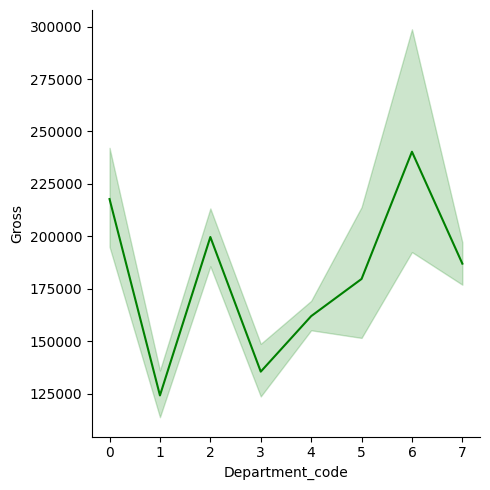

In [12]:
# Visual Exploratory Analysis:

# Affect of Department (code) on Gross
import seaborn as sns

sns.relplot(data=df, x ='Department_code', y='Gross', color='green', kind="line")

<Axes: xlabel='Years_exp', ylabel='Gross'>

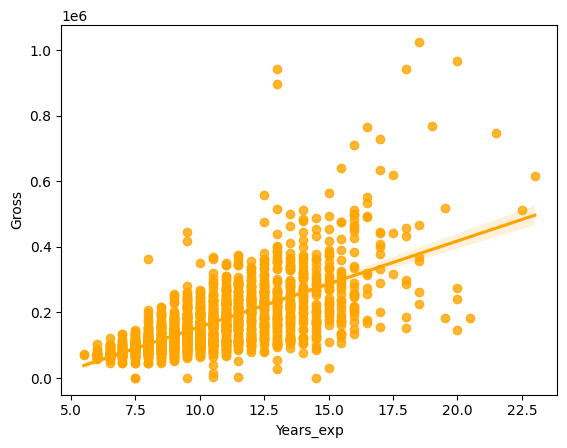

In [13]:
# Affect of Experience on Gross

sns.regplot(data=df, x='Years_exp', y='Gross', color='orange')

<Axes: xlabel='Years_exp', ylabel='Gross'>

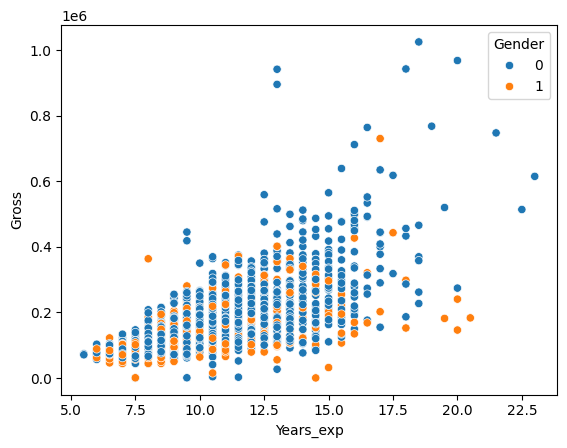

In [14]:
# Affect of Gender on Gross
# Note: 'Male' - 0, 'Female' - 1

sns.scatterplot(data=df, x='Years_exp', y='Gross', color='blue', hue='Gender')

In [15]:
print(f"Average Male gross: {round(df['Gross'][(df['Gender'] == 0)].mean())}")
print(f"Average Female gross: {round(df['Gross'][(df['Gender'] == 1)].mean())}")

Average Male gross: 189332
Average Female gross: 140560


C:\Users\Adel Al-Daheri\AppData\Local\Temp\ipykernel_13132\1862981433.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette=['purple', 'coral'])


<Axes: xlabel='Gender', ylabel='count'>

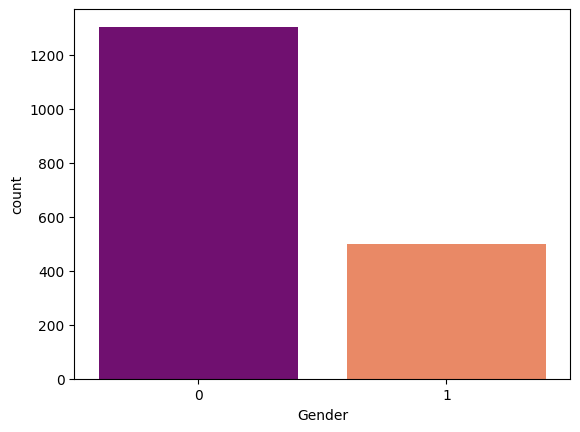

In [16]:
# Male earning is higher than Female
# Let's check the number of Male and Female

sns.countplot(data=df, x='Gender', palette=['purple', 'coral'])

C:\Users\Adel Al-Daheri\AppData\Local\Temp\ipykernel_13132\3334006378.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette=['purple', 'coral']) # not working = add inplace=True to code above


<Axes: xlabel='Gender', ylabel='count'>

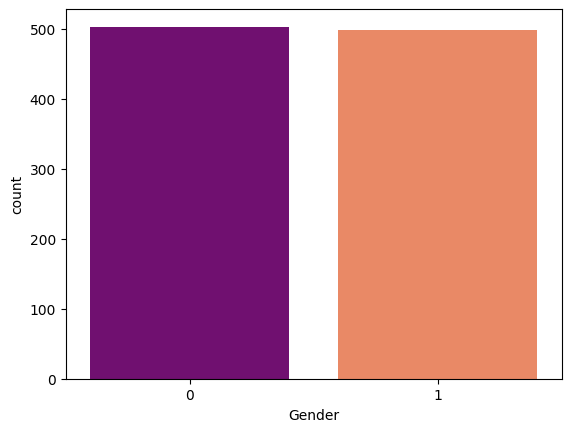

In [17]:
# Male count is higher than Female one
# This could affect accuracy of gross prediction 

# Allowing for an equal count for both Genders

removal = df[df['Gender'] == 0] # only rows with 0 in Gender column
filter = removal.sample(n=(1300-500)) # Random selection of Male rows
# equal to difference between Male and Female
df.drop(filter.index, axis=0, inplace=True) # Remove extra Male rows 

# Check equal Male to Female count 
sns.countplot(data=df, x='Gender', palette=['purple', 'coral']) # not working = add inplace=True to code above

<Axes: xlabel='Tenure (months)', ylabel='Gross'>

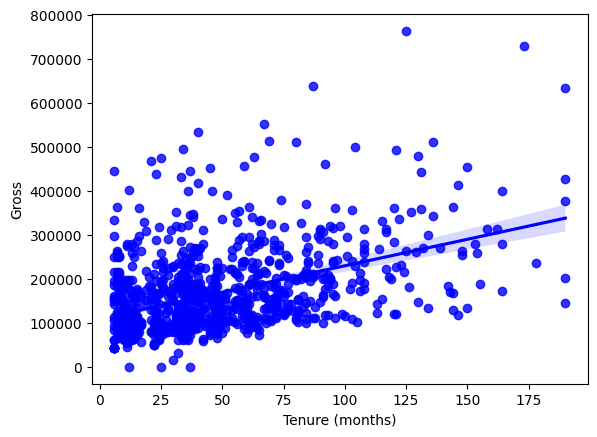

In [18]:
# Affect of Tenure (How long employ works for current company) on Gross

sns.regplot(data=df, x='Tenure (months)', y='Gross', color='blue')

In [19]:
# Check the final, transformed dataset

df

,Gender,Age,Department,Department_code,Years_exp,Tenure (months),Gross
0,0,25,Tech,7,7.5,7,74922
1,1,26,Operations,3,8.0,6,44375
2,0,24,Operations,3,7.0,8,82263
4,0,29,Engineering,0,9.5,25,235405
6,1,27,Operations,3,8.5,6,44375
...,...,...,...,...,...,...,...
1789,1,27,Other,4,8.5,10,148312
1797,0,29,Other,4,9.5,34,88934
1798,0,27,Engineering,0,8.5,33,133224
1799,0,29,Operations,3,9.5,15,72547


In [20]:
# Linear Regression model:


# Creation of inputs and output (Gross)

output = df['Gross']
inputs = df.drop(['Gross', 'Department'], axis='columns')


In [21]:
# Check output

output

0        74922
1        44375
2        82263
4       235405
6        44375
         ...  
1789    148312
1797     88934
1798    133224
1799     72547
1800    227176
Name: Gross, Length: 1002, dtype: int64

In [22]:
# Check inputs

inputs

,Gender,Age,Department_code,Years_exp,Tenure (months)
0,0,25,7,7.5,7
1,1,26,3,8.0,6
2,0,24,3,7.0,8
4,0,29,0,9.5,25
6,1,27,3,8.5,6
...,...,...,...,...,...
1789,1,27,4,8.5,10
1797,0,29,4,9.5,34
1798,0,27,0,8.5,33
1799,0,29,3,9.5,15


In [23]:
# Initiate Linear Regression model

model = LinearRegression()

In [24]:
# Train model 

model.fit(inputs,output)

LinearRegression()

In [25]:
# Test model score (How much the model fits the dataset)

model.score(inputs,output) # make percentage sign 

0.45250926695720994

In [26]:
# Predicting salary based upon test data

test_data = [[1, 24, 7, 3, 10]] # Female, 28yrld, Tech department, 3yr exp, 10 months in job

predict_list = model.predict(test_data).tolist() # Numpy array to list
prediction = predict_list[0]
prediction = round(prediction,2) # 2.d.p. 
prediction # print it out nicely '£..'

c:\Users\Adel Al-Daheri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


55567.04

In [27]:
# Save model into a file

joblib.dump(model, 'salary_predictor.pkl')


['salary_predictor.pkl']